<a href="https://colab.research.google.com/github/Marwa-Afnouch/Marwa-Thesis/blob/master/bone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install tensorflow version 2
%tensorflow_version 2.x

In [3]:
# Importing librar

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [4]:
# Create path

train_loc = '//content/drive/MyDrive/our_Data_div/train'
test_loc = '/content/drive/MyDrive/our_Data_div/val'

In [5]:
# resize images 

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 763 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [6]:
traindata.class_indices

{'Abnormal': 0, 'Normal': 1}

In [7]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [8]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='CNN_BONE')

In [9]:
# Print network structure
model.summary()

Model: "CNN_BONE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 64)        0  

In [10]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [11]:
# start Train/Test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
23/23 [==============================] - 387s 17s/step - loss: 0.7548 - accuracy: 0.6237 - val_loss: 0.2575 - val_accuracy: 0.9656
Epoch 2/10
23/23 [==============================] - 16s 718ms/step - loss: 0.1656 - accuracy: 0.9666 - val_loss: 0.0636 - val_accuracy: 0.9750
Epoch 3/10
23/23 [==============================] - 16s 713ms/step - loss: 0.1189 - accuracy: 0.9754 - val_loss: 0.0825 - val_accuracy: 0.9781
Epoch 4/10
23/23 [==============================] - 16s 721ms/step - loss: 0.1092 - accuracy: 0.9760 - val_loss: 0.0570 - val_accuracy: 0.9781
Epoch 5/10
23/23 [==============================] - 16s 704ms/step - loss: 0.0586 - accuracy: 0.9862 - val_loss: 0.0649 - val_accuracy: 0.9750
Epoch 6/10
23/23 [==============================] - 16s 708ms/step - loss: 0.0556 - accuracy: 0.9884 - val_loss: 0.0633 - val_accuracy: 0.9750
Epoch 7/10
23/23 [==============================] - 16s 709ms/step - loss: 0.0572 - accuracy: 0.9867 - val_loss: 0.0469 - val_accuracy: 0.9781


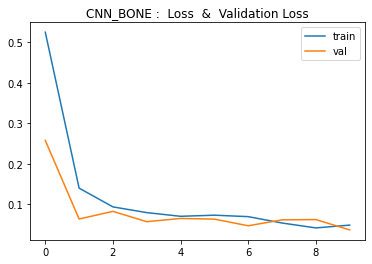

In [12]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_BONE :  Loss  &  Validation Loss')
plt.legend()
plt.show()

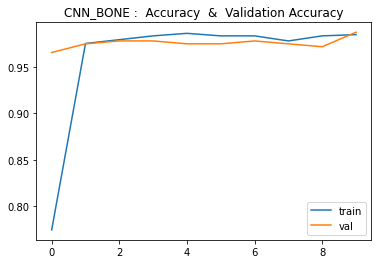

In [13]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_BONE :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[83 85]
 [90 71]]
classification_Report
              precision    recall  f1-score   support

    abnormal       0.48      0.49      0.49       168
      normal       0.46      0.44      0.45       161

    accuracy                           0.47       329
   macro avg       0.47      0.47      0.47       329
weighted avg       0.47      0.47      0.47       329



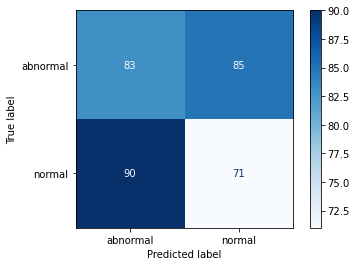

In [15]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['abnormal', 'normal']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()